## Statistics for Data Science

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats




## Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 4: Generate Descriptive Statistics and Visualizations

a) For the "Median value of owner-occupied homes" provide a boxplot

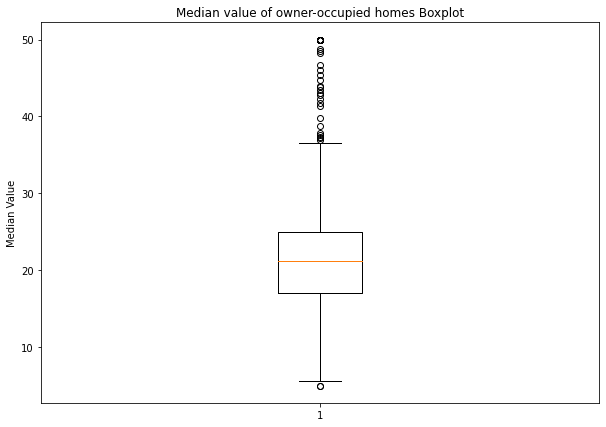

In [4]:

fig = plt.figure(figsize =(10, 7))

# data
data=boston_df["MEDV"]

# Creating plot

ax = fig.add_subplot(111)
ax.boxplot(data)

# Create Title
plt.title("Median value of owner-occupied homes Boxplot")
ax.set_ylabel("Median Value")

# show plot
plt.show()


### Findings: 
The Median values are largely between $17k & $25k although there are a number of outliers upto $50k

b) Provide a bar plot for the Charles river variable

C:\Users\ToddyPC2020\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


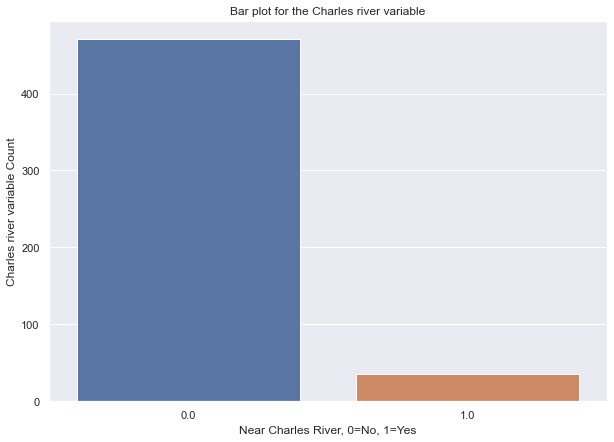

In [5]:
fig = plt.figure(figsize =(10, 7))


sns.set(style="darkgrid")


# data
datay=boston_df["MEDV"]
datax=boston_df["CHAS"]

# Creating plot

ax = fig.add_subplot(111)
ax = sns.countplot(datax)

# Create Title
plt.title("Bar plot for the Charles river variable")
ax.set_ylabel("Charles river variable Count")
ax.set_xlabel("Near Charles River, 0=No, 1=Yes")


# show plot
plt.show()

### Findings: 
The vast majority of houses (over 90%) are not near the Charles River

c) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
boston_df["AgeGroup"]=""

PE_Conditions = [
    (boston_df["AGE"] <= 35),
    (boston_df["AGE"] > 35) & (boston_df["AGE"] < 70),
    (boston_df["AGE"] >= 70)
]
PE_Categories = ['1) 35 years and younger', '2) between 35 and 70 years', '3) 70 years and older']
boston_df['AgeGroup'] = np.select(PE_Conditions, PE_Categories)

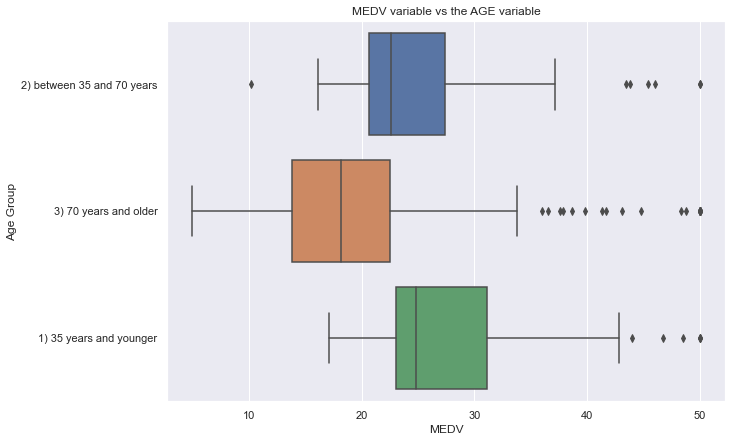

In [7]:

fig = plt.figure(figsize =(10, 7))

# Creating plot
ax= sns.boxplot(x="MEDV",y="AgeGroup",data=boston_df)

# Create Title
plt.title("MEDV variable vs the AGE variable")
ax.set_ylabel("Age Group")

# show plot
plt.show()

In [8]:
### Findings: 
The newer houses have the highest Median House Price Value and the oldest have the lowest median house price value, although the oldest also have a lot of more valuable properties

SyntaxError: invalid syntax (Temp/ipykernel_15308/1112318051.py, line 2)

d) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)


ax.scatter(y = "NOX", x = "INDUS", data = boston_df)
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
ax.set_ylabel("NOX")
ax.set_xlabel("INDUS")
plt.show()

Comment on relationship:
The Level of Nitric Oxide Concentration increses as non-retail business acres in a town increases

e) Create a histogram for the pupil to teacher ratio variable

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = sns.countplot(x = "PTRATIO", data = boston_df)
plt.title("histogram for the pupil to teacher ratio variable")
plt.xticks(rotation=90)
plt.show()

### Findings: 
The Pupil-Teacher Ratio is between 12 and 22 with the vast majority around 20

## Task 5 For each of the following questions;


Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

a) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Null Hypothesis:
There is no significant difference in median value of houses bounded by the Charles River
### Alternate Hypothesis:
There is a significant difference in median value of houses bounded by the Charles River

In [ ]:
boston_df["CHAS_TTest"]=""

PE_Conditions = [
    (boston_df["CHAS"] == 0),
    (boston_df["CHAS"] == 1)
]
PE_Categories = ['No','Yes']
boston_df['CHAS_TTest'] = np.select(PE_Conditions, PE_Categories)

In [ ]:
boston_df

In [ ]:
stats.ttest_ind(boston_df[boston_df['CHAS_TTest'] == "No"]['MEDV'], 
                      boston_df[boston_df['CHAS_TTest'] == "Yes"]['MEDV'], equal_var = True)

### Conclusion
pvalue is less than 0.05 so we reject the Null Hypothesis which means there is significant difference in Median value given distance from Charles River

b) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


### Null Hypothesis:
There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
### Alternate Hypothesis:
There is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)


In [ ]:
stats.f_oneway(boston_df["MEDV"],boston_df["AGE"])

### Conclusion
pvalue is less than 0.05 so we reject the Null Hypothesis which means there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

c) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


### Null Hypothesis:
There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
### Alternate Hypothesis:
There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [ ]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

### Conclusion
pvalue is less than 0.05 and Pearson Coefficient of 0.76 so there is a strong positive correlation between Nitric Oxide concentration and size of non-retail business acres 

d) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [ ]:
x = boston_df['DIS']
y = boston_df['MEDV']

In [ ]:
plt.scatter(x,y)
plt.show()

### Conclusion
There doesnt seem to be a strong impact between the 5 Boston Emplyment centres on the Median value of owner occupied homes 